In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
file = '/content/drive/MyDrive/processed_asteroid.csv'

In [7]:
df = pd.read_csv(file)

In [66]:
df.head()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),data_arc(d),n_obs_used,diameter,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,8822.0,1002,939.400,...,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,72318.0,8490,545.000,...,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,72684.0,7104,246.596,...,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,24288.0,9325,525.400,...,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,63507.0,2916,106.699,...,0,0,0,0,0,1,0,0,0,0


In [8]:
#Split data into features and target.
y = df['diameter']
X = df.drop(columns = 'diameter')

In [9]:
#Standarize the features

#Apply a standard scaler to the data.
SS_scaler = StandardScaler()

# Fit the standard scaler to the data.
X_std = SS_scaler.fit_transform(X)

In [10]:
#Create training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=42)

In [11]:
print('Shape of X and y',X.shape,y.shape )
print('X_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

Shape of X and y (137636, 23) (137636,)
X_train_shape (110108, 23)
X_test_shape (27528, 23)
y_train_shape (110108,)
y_test_shape (27528,)


R2 Score: A rule of thumb for acceptable R2 with 0.75, 0.50, and 0.25 are described as substantial, moderate and weak respectively

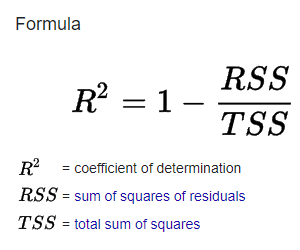

Linear_Regression

In [28]:
from sklearn.metrics import mean_squared_error      #for getting the mean squared error
from sklearn.metrics import r2_score         #to get the accuracy of each model

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2) 


root mean square error : 8.28102811721005
R2 Score :  0.30088884003619953


In [22]:
print(f'constant = {model.intercept_}')
print(f'coefficients = {model.coef_}')

constant = 5.487630863134105
coefficients = [-7.99782220e+10  3.45900726e+00  1.12275706e+00  7.78859139e-02
  6.68295228e-02  1.35552629e+10  7.60625205e+10  4.01781962e+00
  1.28819518e+00  2.27075118e+00  3.54401834e+00 -1.66566945e-02
  3.15666079e+11  4.23961685e+11  5.09699920e+10  1.87710454e+11
  1.34833345e+11  4.66160620e+11  1.95778937e+12  3.62518323e+11
  1.62335154e+12  8.28293924e+11  6.94588766e+10]


In [30]:
#Model Evaluation using Adjusted R-Square. 
# Here n = no. of observations and p = no. of independent variables
n = 137636
p = 23
Adj_r_square = 1-(1-r2)*(n-1)/(n-p-1)
print('Adjusted R-Square Error:', Adj_r_square)

Adjusted R-Square Error: 0.3007719929830416


Ridge Regression

In [60]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2) 

root mean square error : 8.281017641191982
R2 Score :  0.3008906088736937


In [61]:
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,65,75,85,100,115,125,135,150,160]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.28002e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 65, 75, 85, 100,
                                   115, 125, 135, 150, 160]},
             scoring='neg_mean_squared_error')

In [63]:
print(ridge_regressor.best_params_)

{'alpha': 160}


In [64]:
model = Ridge(alpha=160)
model.fit(X_train, y_train)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2) 

root mean square error : 8.27782496044517
R2 Score :  0.30142957713057217


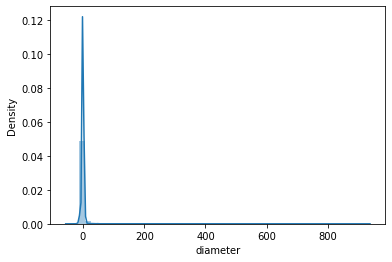

In [65]:
sns.distplot(y_test-diameterPrediction)

Lasso Regression

In [67]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 8.263816406244741
R2 Score :  0.3037919564493371


In [68]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,115,125,135,150,160]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.959e+06, tolerance: 7.355e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+06, tolerance: 6.978e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

{'alpha': 1e-15}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+06, tolerance: 9.424e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [69]:
print(lasso_regressor.best_params_)

{'alpha': 1e-15}


In [70]:
model = linear_model.Lasso(alpha=1e-15)
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 8.28103911414248
R2 Score :  0.30088698324180574


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+06, tolerance: 9.424e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


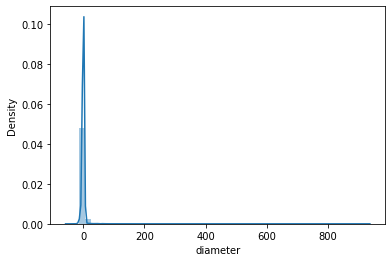

In [71]:
sns.distplot(y_test-diameterPrediction)

K Nearest Neighbour

In [79]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 6.977211284594397
R2 Score :  0.5037032109088937


In [80]:
from sklearn.model_selection import KFold
KNN = KNeighborsRegressor()
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [4,5,6,7], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=KNN, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [81]:
grid.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [82]:
model = KNeighborsRegressor(n_neighbors=6, weights="distance" )
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 6.959179555055302
R2 Score :  0.5062651300500712


Support Vector Machines

In [83]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 7.497232277358639
R2 Score :  0.42696697898700176


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf','poly','sigmoid']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.271 total time= 7.7min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.325 total time= 7.5min
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.236 total time= 7.7min
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.303 total time= 7.7min
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.262 total time= 7.8min


Here , Even 5 fold of iteration consumes morethan 40 min.Like this , there will be 60 fold of iteration..It would consume more than 6 hours to give best parameter hint...As soon as get the best parameter and with that retrain the model for best r2 value.